## Audience Imact on Games in Europe 2019-20

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
# The data files for each league
epl_att_data = "../final-resources/EPL/EPL_scores_attendances.csv"
bun_att_data = "../final-resources/BUN/BUN_scores_attendances.csv"
lig_att_data = "../final-resources/LIG/LIG_scores_attendances.csv"
ser_att_data = "../final-resources/SER/SER_scores_attendances.csv"
images_path = "../images/"

### Setting and Functions for charts

In [12]:
# The following columns will be selected from the dataset
cols = ["Date",
    "HomeTeam",
    "HomeTeam ID", 
    "HomeScore",
    "AwayTeam",
    "AwayTeam ID",
    "AwayScore", 
    "Result",
    "Attendance"]

# Data cleaning (fillna, types) and print summary numbers
def Summary(df, league):
    
    ndf = df.fillna(0)
    s = ndf["Attendance"]
    if s.dtype == 'object':
        ndf["Attendance"] = s.str.replace(',', '').astype(float)
    
    # The total number of matches of the 'league' in 2019-20
    total = len(ndf['Date'])

    # The number of matches after COVID-19
    Covid_date = "2020-04-01"
    after = len(ndf.loc[ndf["Date"] > Covid_date])
    if league == "All":
        print(f"The number of matches of {league} teams until {ndf['Date'].at[total -1]} is {total}")
        print(f"The number of matches of {league} teams after COVID-19 is {after}")
    return ndf

In [13]:
# Load league data and clean-up
epl_all_data_df = pd.read_csv(epl_att_data)
bun_all_data_df = pd.read_csv(bun_att_data)
lig_all_data_df = pd.read_csv(lig_att_data)
ser_all_data_df = pd.read_csv(ser_att_data)
epl_df = Summary(epl_all_data_df, "EPL")
bun_df = Summary(bun_all_data_df, "BUN")
lig_df = Summary(lig_all_data_df, "LIG")
ser_df = Summary(ser_all_data_df, "SER")

# Combine four datasets to create the dataset for all matches
all_df = epl_df.append(bun_df, ignore_index=True)
all_df = all_df.append(lig_df, ignore_index=True)
all_df = all_df.append(ser_df, ignore_index=True)
all_df = Summary(all_df, "All")
all_df.describe()

The number of matches of All teams until 2020-07-13 is 1337
The number of matches of All teams after COVID-19 is 298


,HomeScore,AwayScore,Attendance
count,1337.000000,1337.000000,1337.000000
mean,1.545251,1.284966,21806.175019
std,1.280178,1.205162,22810.755768
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,17547.000000
75%,2.000000,2.000000,38517.000000
max,8.000000,9.000000,93426.000000


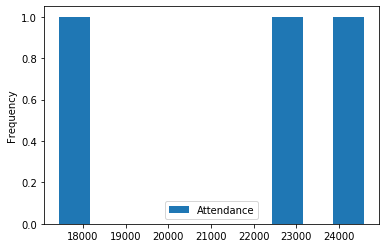

In [17]:
result_df = all_df.groupby("Result")["Attendance"].mean().reset_index()
result_df.plot(kind="hist")